In [90]:
using Distributions
using Plots
using StatsPlots

In [100]:
using StatsBase
using SpecialFunctions

# zad 1

In [60]:
?percentile

search: percentile percentilerank



```
percentile(x, p)
```

Return the `p`th percentile of a collection `x`, i.e. `quantile(x, p / 100)`.


In [41]:
N(μ,σ)=begin
    x=rand()
    y=rand()
    return σ*√(-2*log(x))*sin(2*π*y)+μ
end

N (generic function with 1 method)

In [44]:
X(μ,σ)=begin
    abs(N(μ,σ)-μ)
end

X (generic function with 1 method)

In [43]:
X(μ,σ)=abs(rand(Normal(μ,σ))-μ)

X (generic function with 1 method)

In [30]:
X(2,3)

1.7630717775919944

In [17]:
σ=3
μ=2
n=1e5

100000.0

In [45]:
A=[X(μ,σ) for i in 1:n];

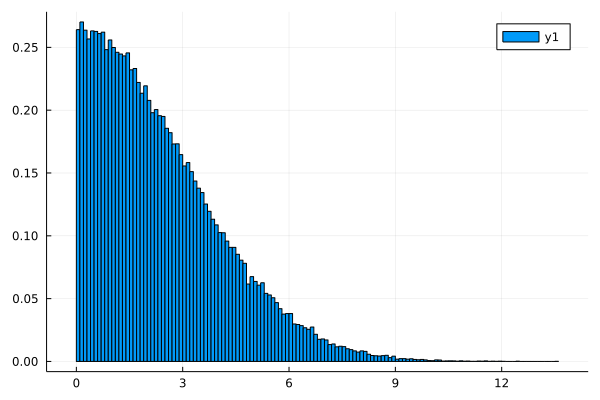

In [46]:
histogram(A, normed=true)

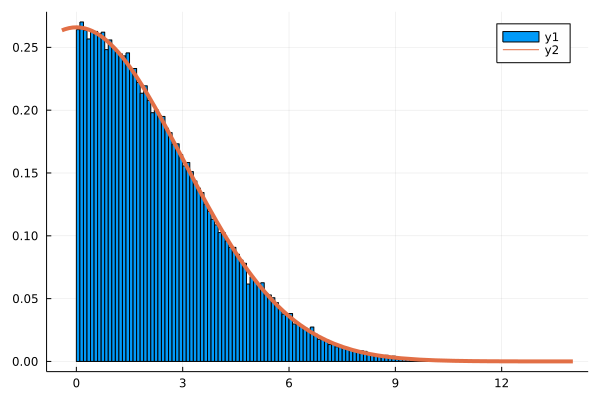

In [47]:
plot!(x->√(2/π)/σ*exp(-x^2/2/σ^2), linewidth=4)

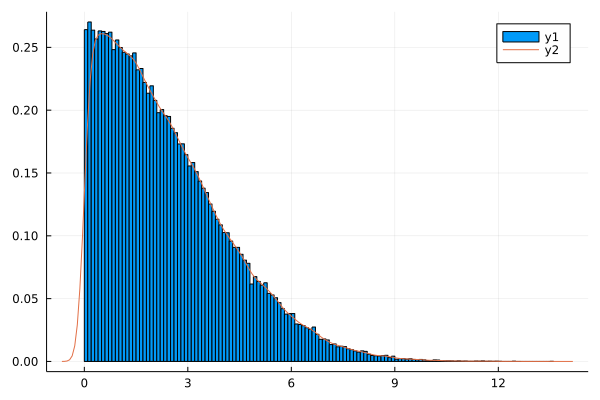

In [94]:
histogram(A, normed=true)
density!(A)

In [104]:
F(x)=sum(A[i]<x for i in 1:length(A))/length(A)

F (generic function with 1 method)

In [108]:
f(x;μ,σ)=begin
    (1+erf((x-μ)/σ/√2))/2
end

f (generic function with 1 method)

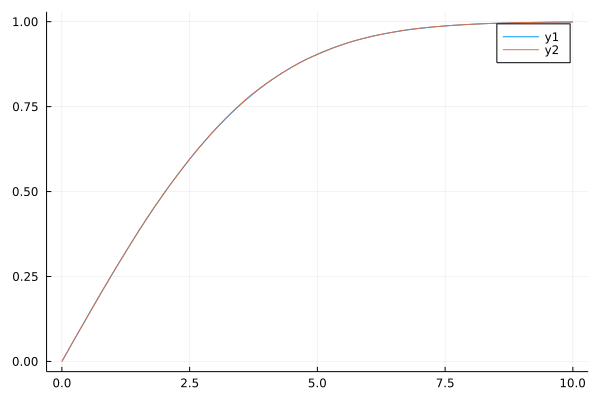

In [109]:
plot(t->f(t+μ,μ=μ, σ=σ)-f(μ-t,μ=μ, σ=σ),0:0.1:10)
plot!(t->F(t), 0:0.1:10)

# zad 2

$\mathbb{E}X=\int\limits_{0}^{\infty}t\cdot\sqrt{\dfrac{2}{\pi}}\text{d}t=\sqrt{\dfrac{2}{\pi}}\sigma$

Estymatro metodą momentów
$$\dfrac{1}{n}\sum\limits_{i=0}^{n}X_i=\sqrt{\frac{2}{\pi}}\sigma\quad\rightarrow\quad\sigma=\dfrac{\sqrt{\pi}}{\sqrt{2}n}\sum\limits_{i=0}^{n}X_i$$

Estymowanie metodą największej wiarygodności
$$L(\boldsymbol{X},\theta)=\prod\limits_{i=1}^n\sqrt{\frac{2}{\pi}}\frac{1}{\theta}\exp\left(-\frac{x_i^2}{2\theta^2}\right)$$
Tradycyjnie $\ln(L)$, te same ekstrema, $\frac{\text{d}}{\text{d}\theta}\ln(L)=0$ i uzasadnic, że to ekstremum
$$\theta=\sqrt{\dfrac{1}{n}\sum\limits_{i=1}^n X_i^2}$$

In [110]:
σ=rand()*10

4.458846937161962

In [115]:
μ=0
n=100
Ns=1000

1000

In [129]:
A=[X(μ,σ) for i in 1:n];

In [138]:
s1=zeros(Ns)
s2=zeros(Ns);

In [139]:
for i in 1:Ns
    A=[X(μ,σ) for i in 1:n];
    s1[i]=√(π/2)sum(A)/n
    s2[i]=√(sum(A.^2)/n)
end

In [133]:
s1=√(π/2)sum(A)/n

4.400705702843872

In [136]:
s2=√(sum(A.^2)/n)

4.390375175782957

In [ ]:
plot(s1,)

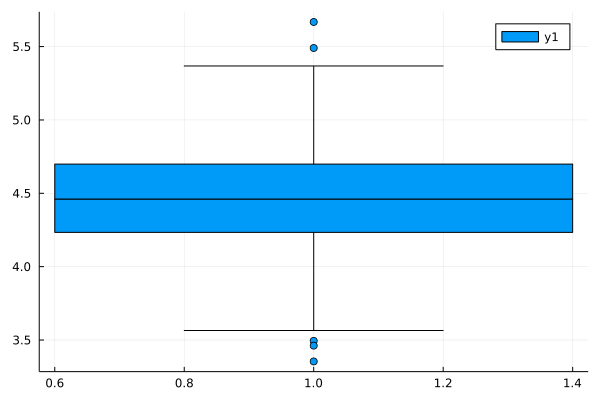

In [142]:
boxplot(s1)

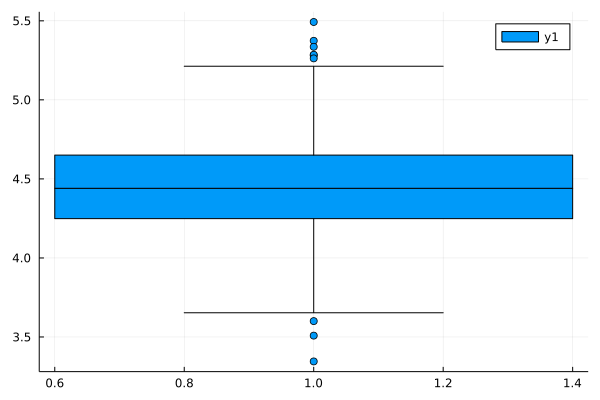

In [143]:
boxplot(s2)

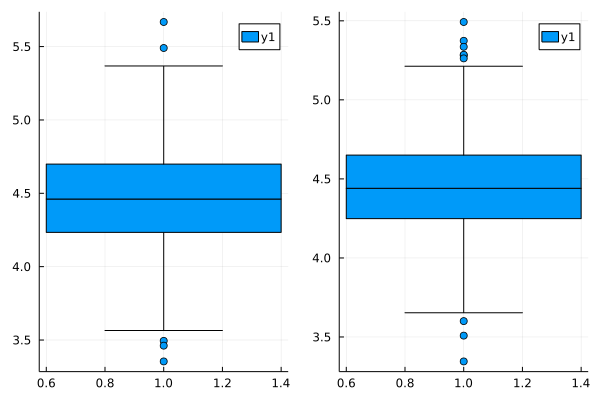

In [144]:
plot(boxplot(s1),boxplot(s2))

# Smieci

In [79]:
EstJ(n;μ=2,σ=3)=begin
   
    
    
    Xs=[X(μ,σ) for i in 1:n]
    h=0.9*min(σ,percentile(Xs,0.95))/n^5
    println(h)
    h=0.001
    f(x)=begin
        1/√(2π)*exp(-x^2/2)
    end
    g(x)=begin
        sum(f((Xs[i]-x)/h) for i in 1:n)/n/h^1
    end
    [g(x) for x in 0:0.001:6]
    
end

EstJ (generic function with 1 method)

In [80]:
EstJ(10000)

3.9649267533565926e-21


6001-element Vector{Float64}:
 0.184390289703742
 0.3510836760980355
 0.4737231818369806
 0.4458169844163117
 0.3206601883823916
 0.24290655671987418
 0.22226972693398503
 0.18390657228813453
 0.138451691295842
 0.15263583367970426
 0.23652963004649924
 0.28366869545175505
 0.2680386672812344
 ⋮
 0.009270509537305334
 0.031040377745506276
 0.038247747805448054
 0.017773377675169455
 0.008327616745136115
 0.024558642300415007
 0.041807942740290004
 0.03775278937407516
 0.04148645818768811
 0.03946476056799847
 0.035272996222813595
 0.051578719383517546

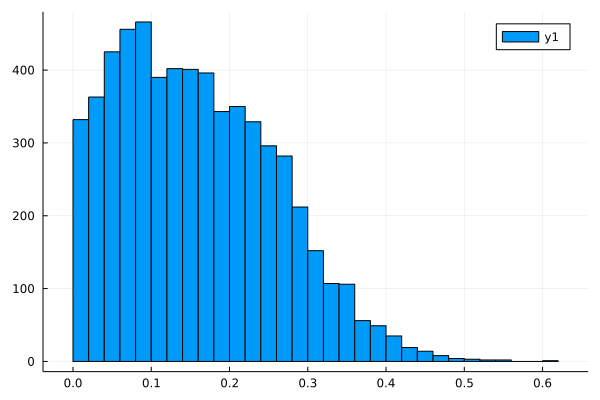

In [81]:
histogram(ans)

In [82]:
?density

search: density density! KernelDensity DimensionMismatch



```
density(x)
density!(x)
```

Make a line plot of a kernel density estimate of x.

# Arguments

  * `x`: AbstractVector of samples for probability density estimation

# Example

```julia-repl
julia> using StatsPlots
julia> density(randn(100_000))
```
